In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import gmean
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import clr

In [769]:
lr = LinearRegression()

In [884]:
zs = 1000 * np.random.rand(100) # 1000 * np.random.rand(100)
ys = 1000 - zs #  100 * np.random.rand(100) # np.repeat(100, zs.shape)
xs = np.random.normal(1000, 10, 100)# np.repeat(100, zs.shape)
X1 = np.array([xs, ys, zs]).T

In [885]:
ys.min()

2.0221167182863837

In [886]:
zs.max()

997.9778832817136

In [887]:
# cols = np.array([np.zeros(len(zs)), xs, ys, zs]).T
cols = np.array([np.zeros(len(zs)), np.zeros(len(zs)), zs / max(zs)]).T

In [888]:
lr.fit(X1, zs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [889]:
lr.coef_

array([ 6.62085531e-16, -5.00000000e-01,  5.00000000e-01])

Text(0.5, 0, 'Z')

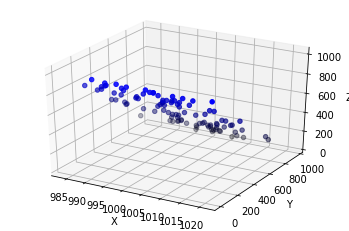

In [890]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=cols)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [891]:
a_p = (xs + 10 * np.random.rand(100))
b_p = (ys + 10 * np.random.rand(100))
c_p = (zs + 10 * np.random.rand(100))
row_sums = a_p + b_p + c_p
a = a_p / row_sums
b = b_p / row_sums
c = c_p / row_sums
X2 = np.array([a, b, c]).T

Text(0.5, 0, 'Z')

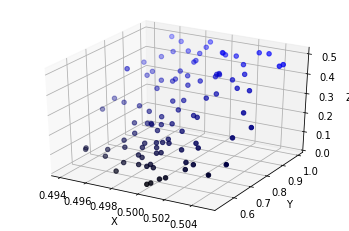

In [892]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, 1 - b, c, c=cols)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [893]:
lr = LinearRegression()
lr.fit(X2, zs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [894]:
lr.coef_

array([-2.63428169e+14, -2.63428169e+14, -2.63428169e+14])

In [864]:
gamma = c
top = np.sqrt(0.9)
beta = (gamma / (2 * top)) + ( 1 - gamma / top) * (a / (a + b))

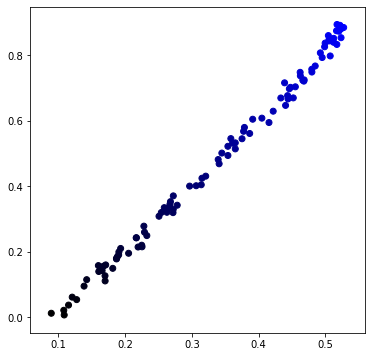

In [877]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(beta, gamma, c=cols)

Text(0, 0.5, '$\\log\\left(\\frac{y}{x}\\right)$')

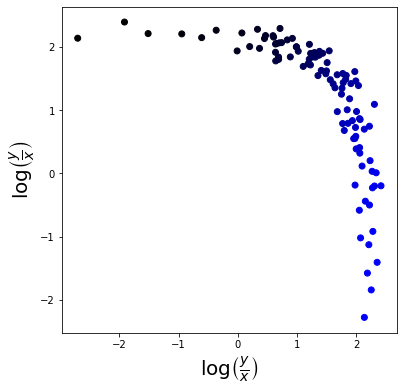

In [878]:
fig, ax = plt.subplots(figsize=(6, 6))
X4 = np.array([np.log(c / a), np.log(b / a)]).T
plt.scatter(X4[:, 0], X4[:, 1] , c=cols)
ax.set_xlabel('$\log\\left(\\frac{y}{x}\\right)$', fontsize=20)
ax.set_ylabel('$\log\\left(\\frac{y}{x}\\right)$', fontsize=20)

In [867]:
lr = LinearRegression()
lr.fit(X4, zs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [868]:
lr.coef_

array([ 158.12472915, -163.41572092])

In [869]:
clrs = np.log(np.array([a, b, c]).T / gmean(np.array([a, b, c]), axis=1).reshape(-1, 1).T)

In [870]:
gmean(np.array([a, b, c]), axis=1).reshape(-1, 1)

array([[0.09331555],
       [0.30225339],
       [0.36009859]])

In [871]:
# clrs = clr(np.array([a, b, c]).T)

Text(0.5, 0, 'Z')

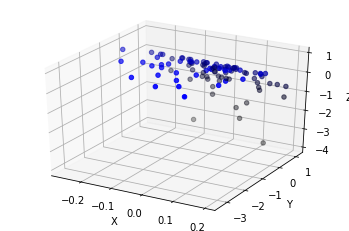

In [872]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clrs[:, 0], clrs[:, 1], clrs[:, 2], c=cols)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [873]:
lr.fit(clrs, zs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [874]:
lr.coef_

array([ -19.44627115, -164.4794421 ,  156.92461704])

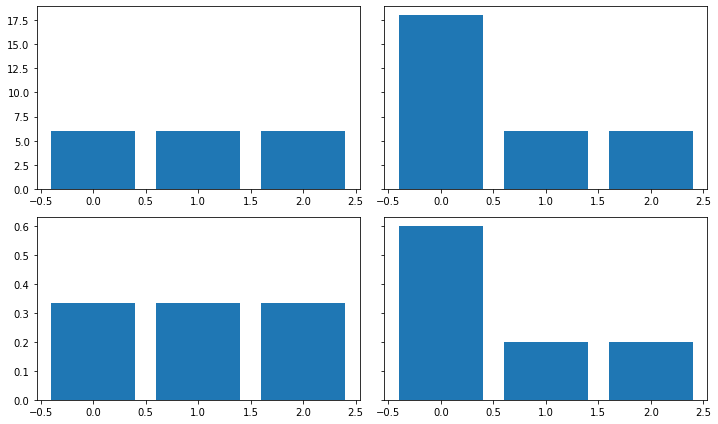

In [921]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharey='row')

count1 = np.array([6, 6, 6])
count2 = np.array([18, 6, 6])
ax[0, 0].bar(x=[0, 1, 2], height=count1)
ax[0, 1].bar(x=[0, 1, 2], height=count2)
ax[1, 0].bar(x=[0, 1, 2], height=count1/count1.sum())
ax[1, 1].bar(x=[0, 1, 2], height=count2/count2.sum())
plt.tight_layout()

In [923]:
clr(np.array([count1, count2]))

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.73240819, -0.3662041 , -0.3662041 ]])

In [30]:
x = np.random.uniform(0, 4 * np.pi, 1000)
y = 4 * np.pi * np.sin(x) + np.random.normal(0, 0.1, 1000)
X = np.array([x, y]).T

In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
nn = NearestNeighbors(n_neighbors=5)

In [33]:
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [34]:
dist, idx = nn.kneighbors(X)

In [35]:
dist1 = dist[:, 2]

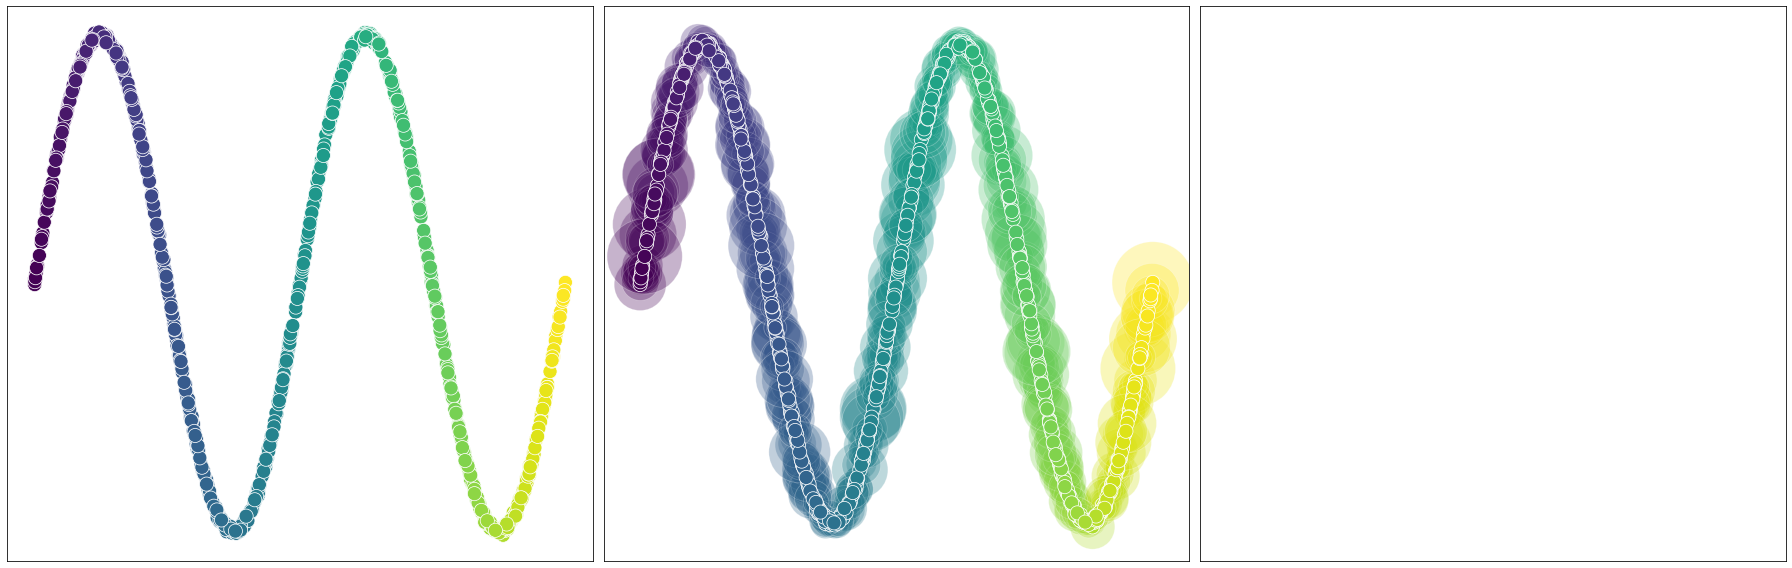

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

# first plot
sns.scatterplot(x, y, hue=x, palette='viridis', legend=False, ax=ax[0], s=200, edgecolors=None,)

sns.scatterplot(x, y, hue=x, palette='viridis', legend=False, ax=ax[1],
                s=10000 * dist1, edgecolors=None, alpha=0.3)
sns.scatterplot(x, y, hue=x, palette='viridis', legend=False, ax=ax[1], s=200, edgecolors=None,)


ax[0].tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax[1].tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax[2].tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tight_layout()

In [37]:
from umap import UMAP

In [52]:
u = UMAP(n_neighbors=60)

In [53]:
help(UMAP)

Help on class UMAP in module umap.umap_:

class UMAP(sklearn.base.BaseEstimator)
 |  Uniform Manifold Approximation and Projection
 |  
 |  Finds a low dimensional embedding of the data that approximates
 |  an underlying manifold.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors: float (optional, default 15)
 |      The size of local neighborhood (in terms of number of neighboring
 |      sample points) used for manifold approximation. Larger values
 |      result in more global views of the manifold, while smaller
 |      values result in more local data being preserved. In general
 |      values should be in the range 2 to 100.
 |  
 |  n_components: int (optional, default 2)
 |      The dimension of the space to embed into. This defaults to 2 to
 |      provide easy visualization, but can reasonably be set to any
 |      integer value in the range 2 to 100.
 |  
 |  metric: string or function (optional, default 'euclidean')
 |      The metric to use to compute distances in high d

In [54]:
Z = u.fit_transform(X)

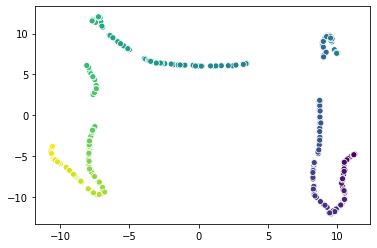

In [56]:
sns.scatterplot(Z[:400, 0], Z[:400, 1], hue=x[:400], palette='viridis', legend=False)